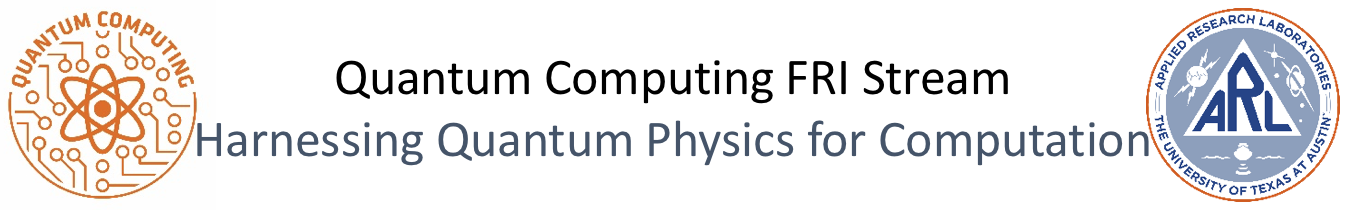

#### Most Recent Lesson: Lesson04 - Programming Qiskit

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram,plot_bloch_multivector
import numpy as np
from qiskit.quantum_info import Statevector

# <font color=green>Homework</font>

$\text{Write a Python function to implement a controlled }\mathbf{X}\text{ gate with }n\text{ controlling qubits.}$

$\text{Start by recursively implementing an }n\text{-controlled }\mathbf{Z}^{a}.$

$\text{A contolled }\mathbf{Z}^{a}\text{ gate can be written as a more general controlled unitary.}$

$$\mathbf{C}^{\mathbf{Z}^{a}}_{ij}=\mathbf{C}^{\mathbf{U}(0,0,a\pi)}_{ij}$$

$\text{Follow the pattern of controlled controlled... gates from Lesson04.}$

$$\mathbf{C}^{\mathbf{Z}^{a}}_{i_{0}\dots i_{n-1}j}=\mathbf{C}^{\mathbf{Z}^{a/2}}_{i_{0}\dots i_{n-2}j} \mathbf{C}_{i_{0}\dots i_{n-2}i_{n-1}} \mathbf{C}^{\mathbf{Z}^{-a/2}}_{i_{n-1}j} \mathbf{C}_{i_{0}\dots i_{n-2}i_{n-1}} \mathbf{C}^{\mathbf{Z}^{a/2}}_{i_{n-1}j}$$





$\text{And note that a controlled }\mathbf{Z}\text{ gate is converted to a controlled }\mathbf{X}\text{ gate by the addition of }\mathbf{H}\text{ gates.}$

$$\mathbf{C}_{i_{0}\dots i_{n-1} j} = \mathbf{H}_{j} \mathbf{C}^{\mathbf{Z}}_{i_{0}\dots i_{n-1} j} \mathbf{H}_{j}$$

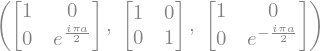

In [4]:
import sympy as sp
theta = sp.symbols('theta')
phi = sp.symbols('phi')
lam = sp.symbols('lambda')

W = sp.Matrix([
    [1,0],
    [0,sp.exp(sp.I*(phi-lam)/2)]
])
V = sp.Matrix([
    [sp.cos(theta/4),-sp.sin(theta/2)],
    [sp.exp(sp.I*phi)*sp.sin(theta/2),sp.exp(sp.I*phi)*sp.cos(theta/4)]
])
E = sp.Matrix([
    [1,0],
    [0,sp.exp(sp.I*(phi+lam)/2)]
])
a = sp.symbols('a')

map = {phi:0,lam:a*sp.pi,theta:0}
E = E.subs(map)
W = W.subs(map)
V = V.subs(map)
sp.init_printing()
E,V,W

# this 
# this means V and Vdag are both the same, E is the hermetian conjugate of W

In [5]:
from qiskit import QuantumCircuit
import numpy as np
def Z(a = 1):
    U = QuantumCircuit(2)
    U.p(a*np.pi/2,1)
    U.cx(0,1)
    U.p(-a*np.pi/2,1)

    # identity

    U.cx(0,1)
    # identity 

    U.p(a*np.pi/2,0)
    U.draw('mpl')
    return U
Z().draw()

┌────────┐
q_0: ────────────■───────────────■──┤ P(π/2) ├
     ┌────────┐┌─┴─┐┌─────────┐┌─┴─┐└────────┘
q_1: ┤ P(π/2) ├┤ X ├┤ P(-π/2) ├┤ X ├──────────
     └────────┘└───┘└─────────┘└───┘

In [6]:
def CNOT(controls = [0],target = 1,quantumCircuit = QuantumCircuit(2)):
    quantumCircuit.h(target)
    control_z(a=1,target=target,controls=controls,quantumCircuit = quantumCircuit)
    quantumCircuit.h(target)
debug = False
targets = []
ay = []

def control_z(a=1,target = 0,controls = [0,1],quantumCircuit = 0):
    if(debug):
        print(target,controls)
    targets.append(target)
    
    if(len(controls) == 1):
        if(debug):
            print('controls|',controls)
        if(debug):
            print('t|',target)   
        ay.append(a)
        qc.__annotations__ = {'a':a}
        quantumCircuit.compose(Z(a=a),qubits=[controls[0],target],inplace=True)
        # print each of the input parameters fancy for debugging     
    else:
        quantumCircuit.barrier()
        control_z(a=a/2,target=target,controls =[controls[-1]],quantumCircuit = quantumCircuit)
        quantumCircuit.barrier()
        CNOT(controls=controls[:-1],target=controls[-1],quantumCircuit = quantumCircuit)
        quantumCircuit.barrier()

        control_z(a=-a/2,target=target,controls =[controls[-1]],quantumCircuit = quantumCircuit)
        quantumCircuit.barrier()

        CNOT(controls=controls[:-1],target=controls[-1],quantumCircuit = quantumCircuit)
        quantumCircuit.barrier()

        # print('-----')
        # print(f'{target}-<',controls)
        # print('-----')
        
        control_z(a=a/2,target=target,controls =controls[:-1],quantumCircuit = quantumCircuit)


n = 5

qc = QuantumCircuit(n+1)
controls = list(range(n))

qc.h(n)
qc.barrier()

control_z(a=1,target=n,controls=controls,quantumCircuit = qc)


# qc.mcp(np.pi,controls, n)

qc.barrier()
qc.h(n)


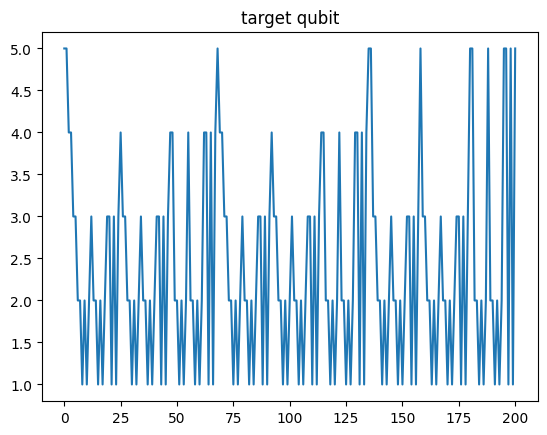

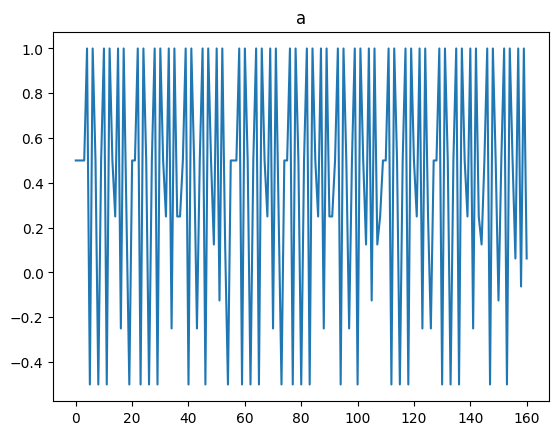

In [7]:
import matplotlib.pyplot as plt
targets
plt.title('target qubit')
plt.plot(range(len(targets)),targets)
plt.show()

plt.title('a')

plt.plot(range(len(ay)),ay)

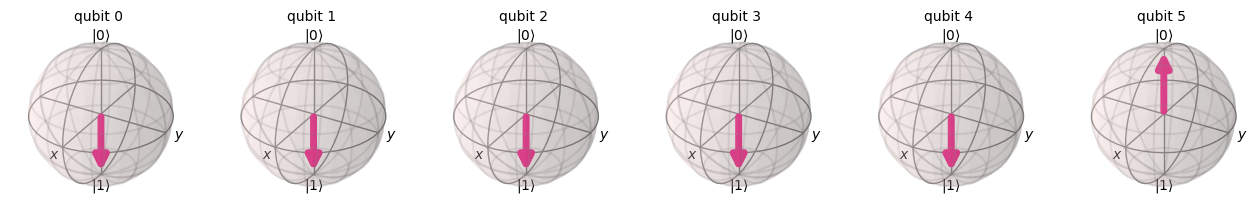

In [8]:
# below plots the qubits from teh multicontrolled not
v1 = Statevector.from_label(('1'+'1'*(n)))
v1 = v1.evolve(qc)
plot_bloch_multivector(v1.data)

In [9]:
# qc.draw('mpl')

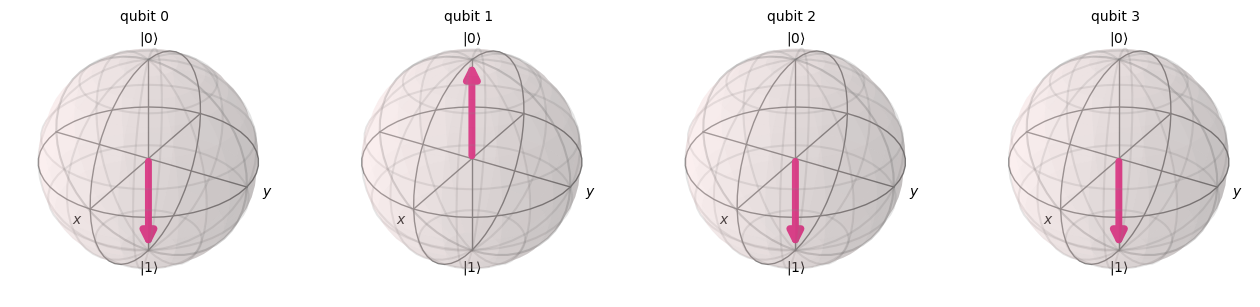

In [10]:
v2 = Statevector.from_label(('1'*(4)))
qc1 = QuantumCircuit(2)
qc1.h(1)
qc1.compose(Z(),inplace=True)
qc1.h(1)
v2 = v2.evolve(qc1)

plot_bloch_multivector(v2.data)

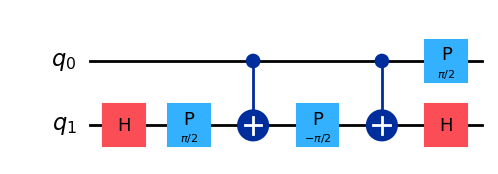

In [11]:
qc1.draw('mpl')

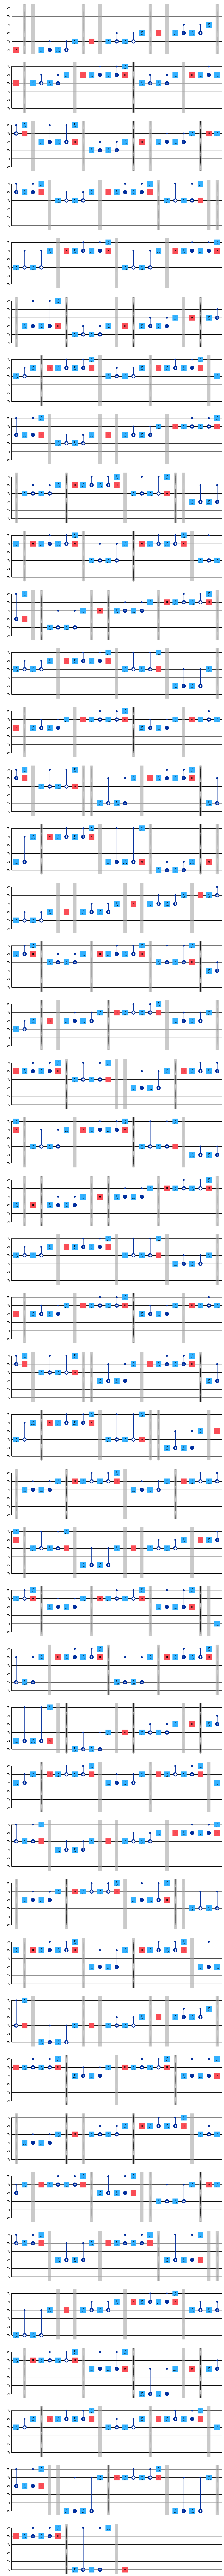

In [12]:
qc.draw('mpl')